# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# Reading csv

In [2]:
movies= pd.read_csv('movies.csv')
ratings= pd.read_csv('ratings.csv')
links_df = pd.read_csv('links.csv')
tags= pd.read_csv('tags.csv')

# What is the shape of "movies.csv"?

In [41]:
movies.shape

(9742, 3)

# What is the shape of "ratings.csv"?


In [42]:
ratings.shape

(100836, 4)

# How many unique "userId" are available in "ratings.csv"?

In [43]:
ratings['userId'].nunique()

610

# Which movie has recieved maximum number of user ratings?

In [45]:
ratings['movieId'].value_counts(sort= True, ascending = False).head(1)

356    329
Name: movieId, dtype: int64

In [47]:
movies[movies['movieId']==356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [48]:
movies[movies['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [50]:
tags[tags['movieId']==2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [51]:
movies[movies['title']=="Terminator 2: Judgment Day (1991)"]

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [52]:
ratings[ratings['movieId']==589]['rating'].mean()

3.970982142857143

# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

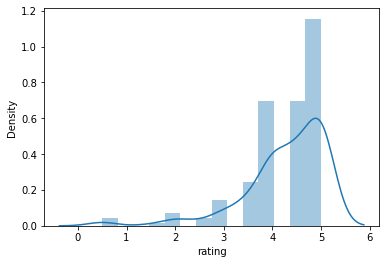

In [54]:
sns.distplot(ratings[ratings['movieId']==2959]['rating'])

In [55]:
ratings[ratings['movieId']==2959]['rating'].skew()

-1.8603186380018706

# 🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [3]:
grouped_ratings = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

In [5]:
merged_df = pd.merge(movies, grouped_ratings, on='movieId')

In [6]:
merged_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [7]:
# Filter the movies with more than 50 ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

In [9]:
min(filtered_df['rating_count'])

51

In [56]:
filtered_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


# Which movie is the most popular based on  average user ratings?

In [58]:
filtered_df[filtered_df['rating_mean']==max(filtered_df['rating_mean'])]

,movieId,title,genres,rating_count,rating_mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [59]:
filtered_df.sort_values(by= 'rating_count',ascending=False).head(5)

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [61]:
filtered_df[filtered_df['genres'].str.contains('Sci-Fi')].sort_values(by= 'rating_count',ascending=False).head(3)

,movieId,title,genres,rating_count,rating_mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000


# Merge with Link 

In [14]:
# Read the links.csv file
links_df = pd.read_csv('links.csv')

# Merge filtered_df with links_df to get IMDb IDs
merged_df = filtered_df.merge(links_df, on='movieId', how='inner')

# Display the merged DataFrame with IMDb IDs
print(merged_df[['movieId', 'title', 'imdbId']])

     movieId                             title   imdbId
0          1                  Toy Story (1995)   114709
1          2                    Jumanji (1995)   113497
2          3           Grumpier Old Men (1995)   113228
3          6                       Heat (1995)   113277
4          7                    Sabrina (1995)   114319
..       ...                               ...      ...
431   106782   Wolf of Wall Street, The (2013)   993846
432   109374  Grand Budapest Hotel, The (2014)  2278388
433   109487               Interstellar (2014)   816692
434   112852    Guardians of the Galaxy (2014)  2015381
435   122904                   Deadpool (2016)  1431045

[436 rows x 3 columns]


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 435
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       436 non-null    int64  
 1   title         436 non-null    object 
 2   genres        436 non-null    object 
 3   rating_count  436 non-null    int64  
 4   rating_mean   436 non-null    float64
 5   imdbId        436 non-null    int64  
 6   tmdbId        436 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 27.2+ KB


# Scapper

In [26]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    imdbId = str(imdbId).zfill(7)
    URL = f"https://www.imdb.com/title/tt{imdbId}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8', 
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    try:
        response = requests.get(URL, headers=request_header)
        response.raise_for_status()  # Raise an error for bad responses
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Check the structure of the page
        imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
        if imdb_rating:
            return imdb_rating.text
        else:
            print(f"Rating not found for URL: {URL}")
            return np.nan
    except requests.RequestException as e:
        print(f"Request failed: {e}")
        return np.nan

# Test with a known IMDb ID
print(scrapper('0211915'))  # Replace with the IMDb ID you want to test


Rating not found for URL: https://www.imdb.com/title/tt0211915/
nan


In [29]:
import requests
from bs4 import BeautifulSoup
import json
import numpy as np

def scrapper(imdbId):
    imdbId = str(imdbId).zfill(7)
    URL = f"https://www.imdb.com/title/tt{imdbId}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8', 
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    try:
        response = requests.get(URL, headers=request_header)
        response.raise_for_status()  # Raise an error for bad responses
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Look for JSON-LD script tags
        scripts = soup.find_all('script', type='application/ld+json')
        for script in scripts:
            try:
                data = json.loads(script.string)
                if '@type' in data and data['@type'] == 'Movie':
                    rating = data.get('aggregateRating', {}).get('ratingValue', np.nan)
                    if rating:
                        return rating
            except json.JSONDecodeError:
                continue
        
        # Fallback: if JSON-LD does not contain rating
        print(f"Rating not found for URL: {URL}")
        return np.nan
        
    except requests.RequestException as e:
        print(f"Request failed: {e}")
        return np.nan

# Test with a known IMDb ID
print(scrapper('0211915'))  # Replace with the IMDb ID you want to test


8.3


In [30]:
merged_df

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [33]:
# Apply the scrapper function to get IMDb ratings
merged_df['imdb_rating'] = merged_df['imdbId'].apply(scrapper)

In [35]:
merged_df

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,imdb_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.7
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


# Mention the movieId of the movie which has the highest IMDB rating.

In [36]:
merged_df[merged_df['imdb_rating']==max(merged_df['imdb_rating'])]

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,imdb_rating
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3


# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [38]:
# Filter for Sci-Fi movies
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi', case=False)]

In [39]:
# Find the movie with the highest IMDb rating among Sci-Fi movies
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax()]

# Get the movieId of that movie
highest_rated_sci_fi_movie_id = highest_rated_sci_fi_movie['movieId']
print("Sci-Fi movie ID with the highest IMDb rating:", highest_rated_sci_fi_movie_id)

Sci-Fi movie ID with the highest IMDb rating: 79132
